# Image Processing 101

We're going to learn about modeling and applications of using text data from a hands-on approach.

For those looking for a more comprehensive dive, I recommend 

 - Stanford Chris Manning's Course with video lectures and homeworks: http://web.stanford.edu/class/cs224n/
 - K. Cho's curriculum from NYU which has more written lectures and homeworks but not videos: https://github.com/nyu-mll/DS-GA-1011-Fall2017

I will be pulling a lot of content from both sources (and re-going through the cs224n homework with all of you because I haven't done the homework in a while) but removing a lot of the discussion about linguistic theory to keep this short-ish.

Just to be honest, contrary to my experience in Images and Recommendation engines where I consider myself an expert, I have less experience in NLP and the field is quickly evolving. So I've built some modern models, but sometimes I forget my fundamentals like how CBOW is trained. I've sort've gotten models to work by debugging sequence lengths for gradient descent stability but I haven't gotten to the point that I have a reliable set of recommendations to solve every problem like with convolutions on images.

So we're gonna learn all this together, and I'll try to make sure you guys come out of this with an understanding of NLP, ability to design and develop language applications, and expertise in PyTorch.

## So what are we learning and why does language need a special set of tools?


### Chris Manning starts by explaining this comic, so I'll do the same
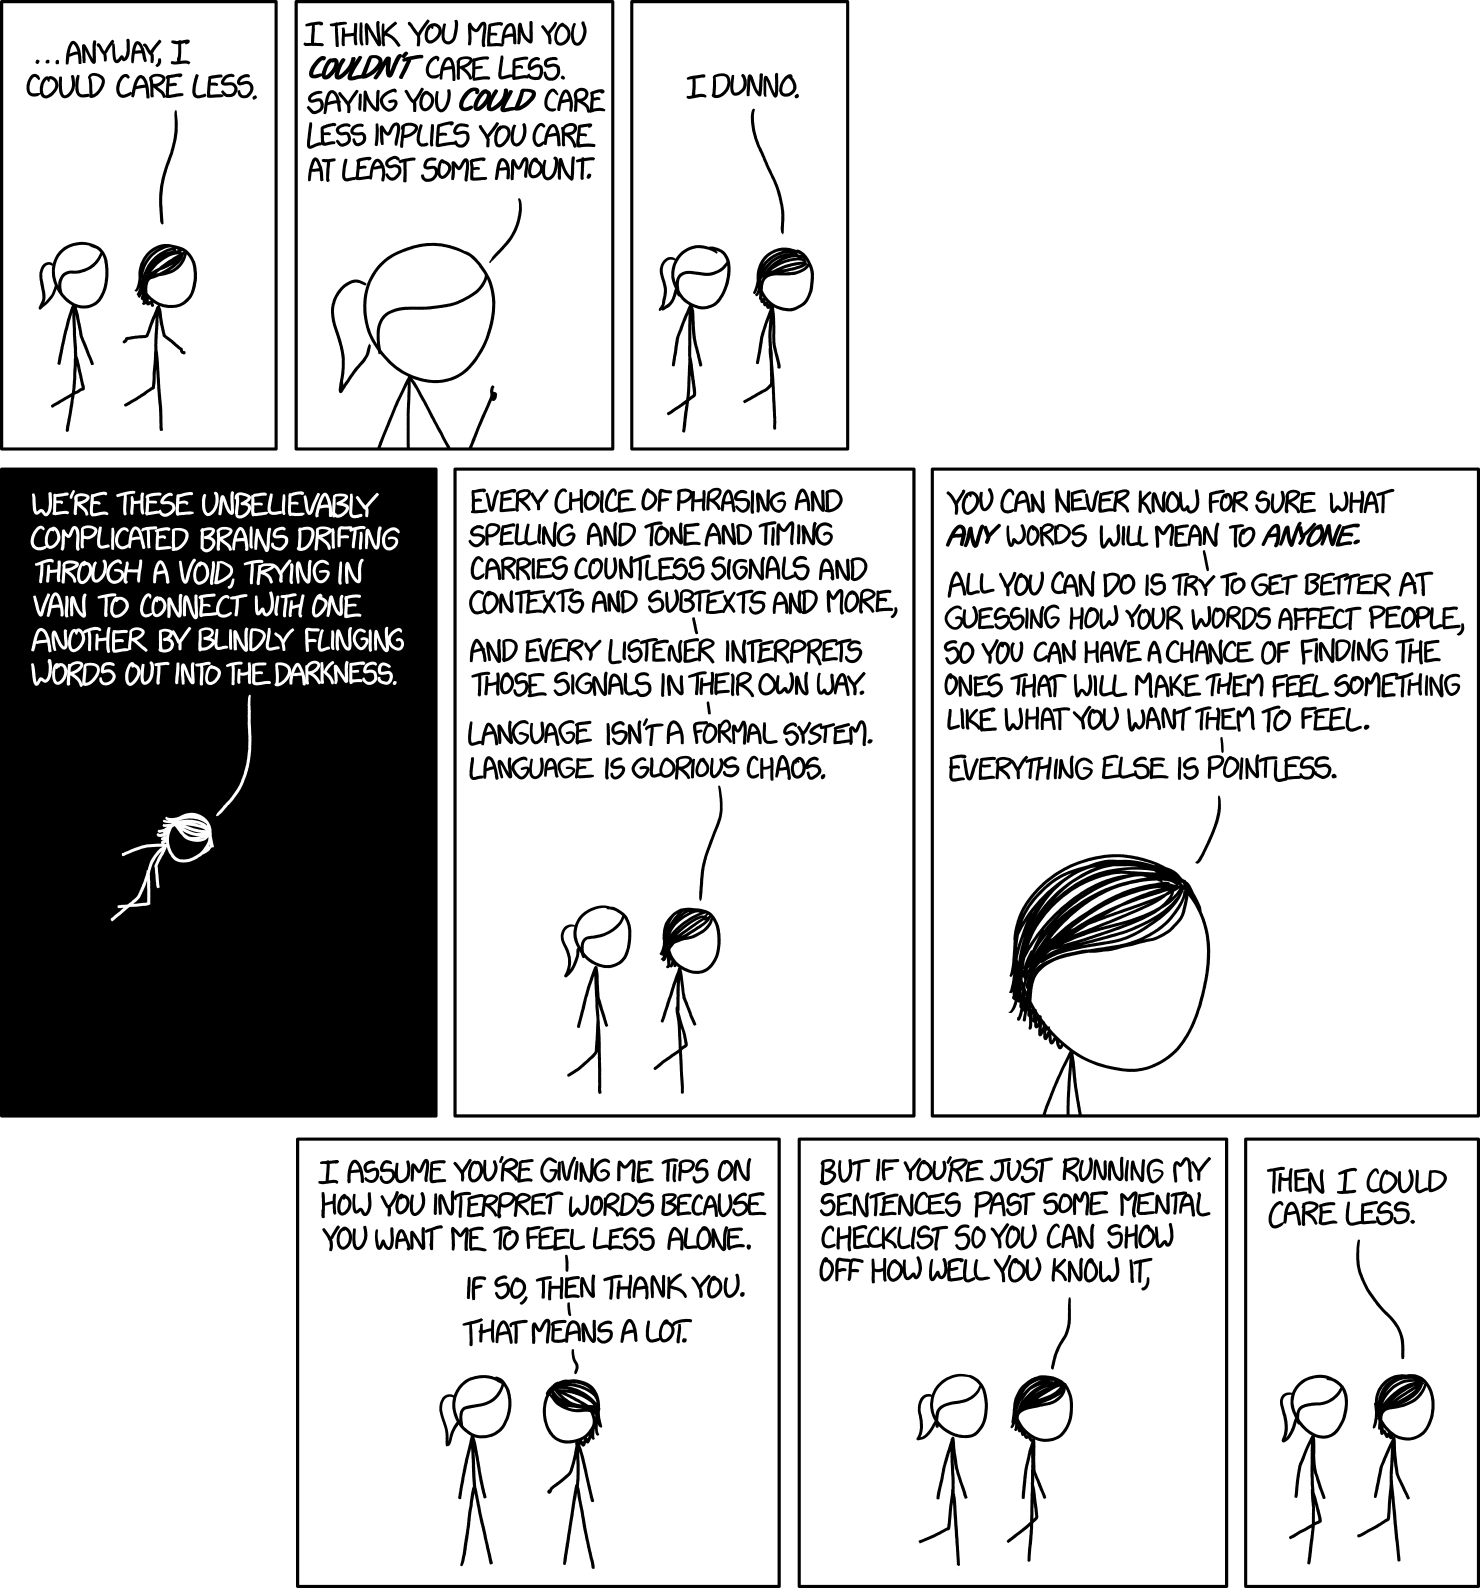
Caption: I literally could care less

### I also liked this comic, just reiterating the same point
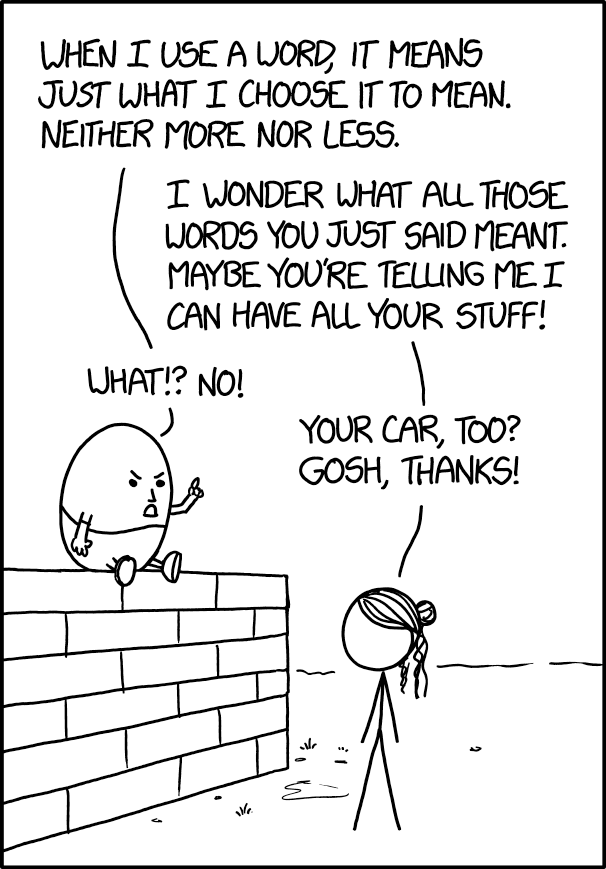
Caption: You're saying that the responsibility for avoiding miscommunication lies entirely with the listener, not the speaker, which explains why you haven't been able to convince anyone to help you down from that wall

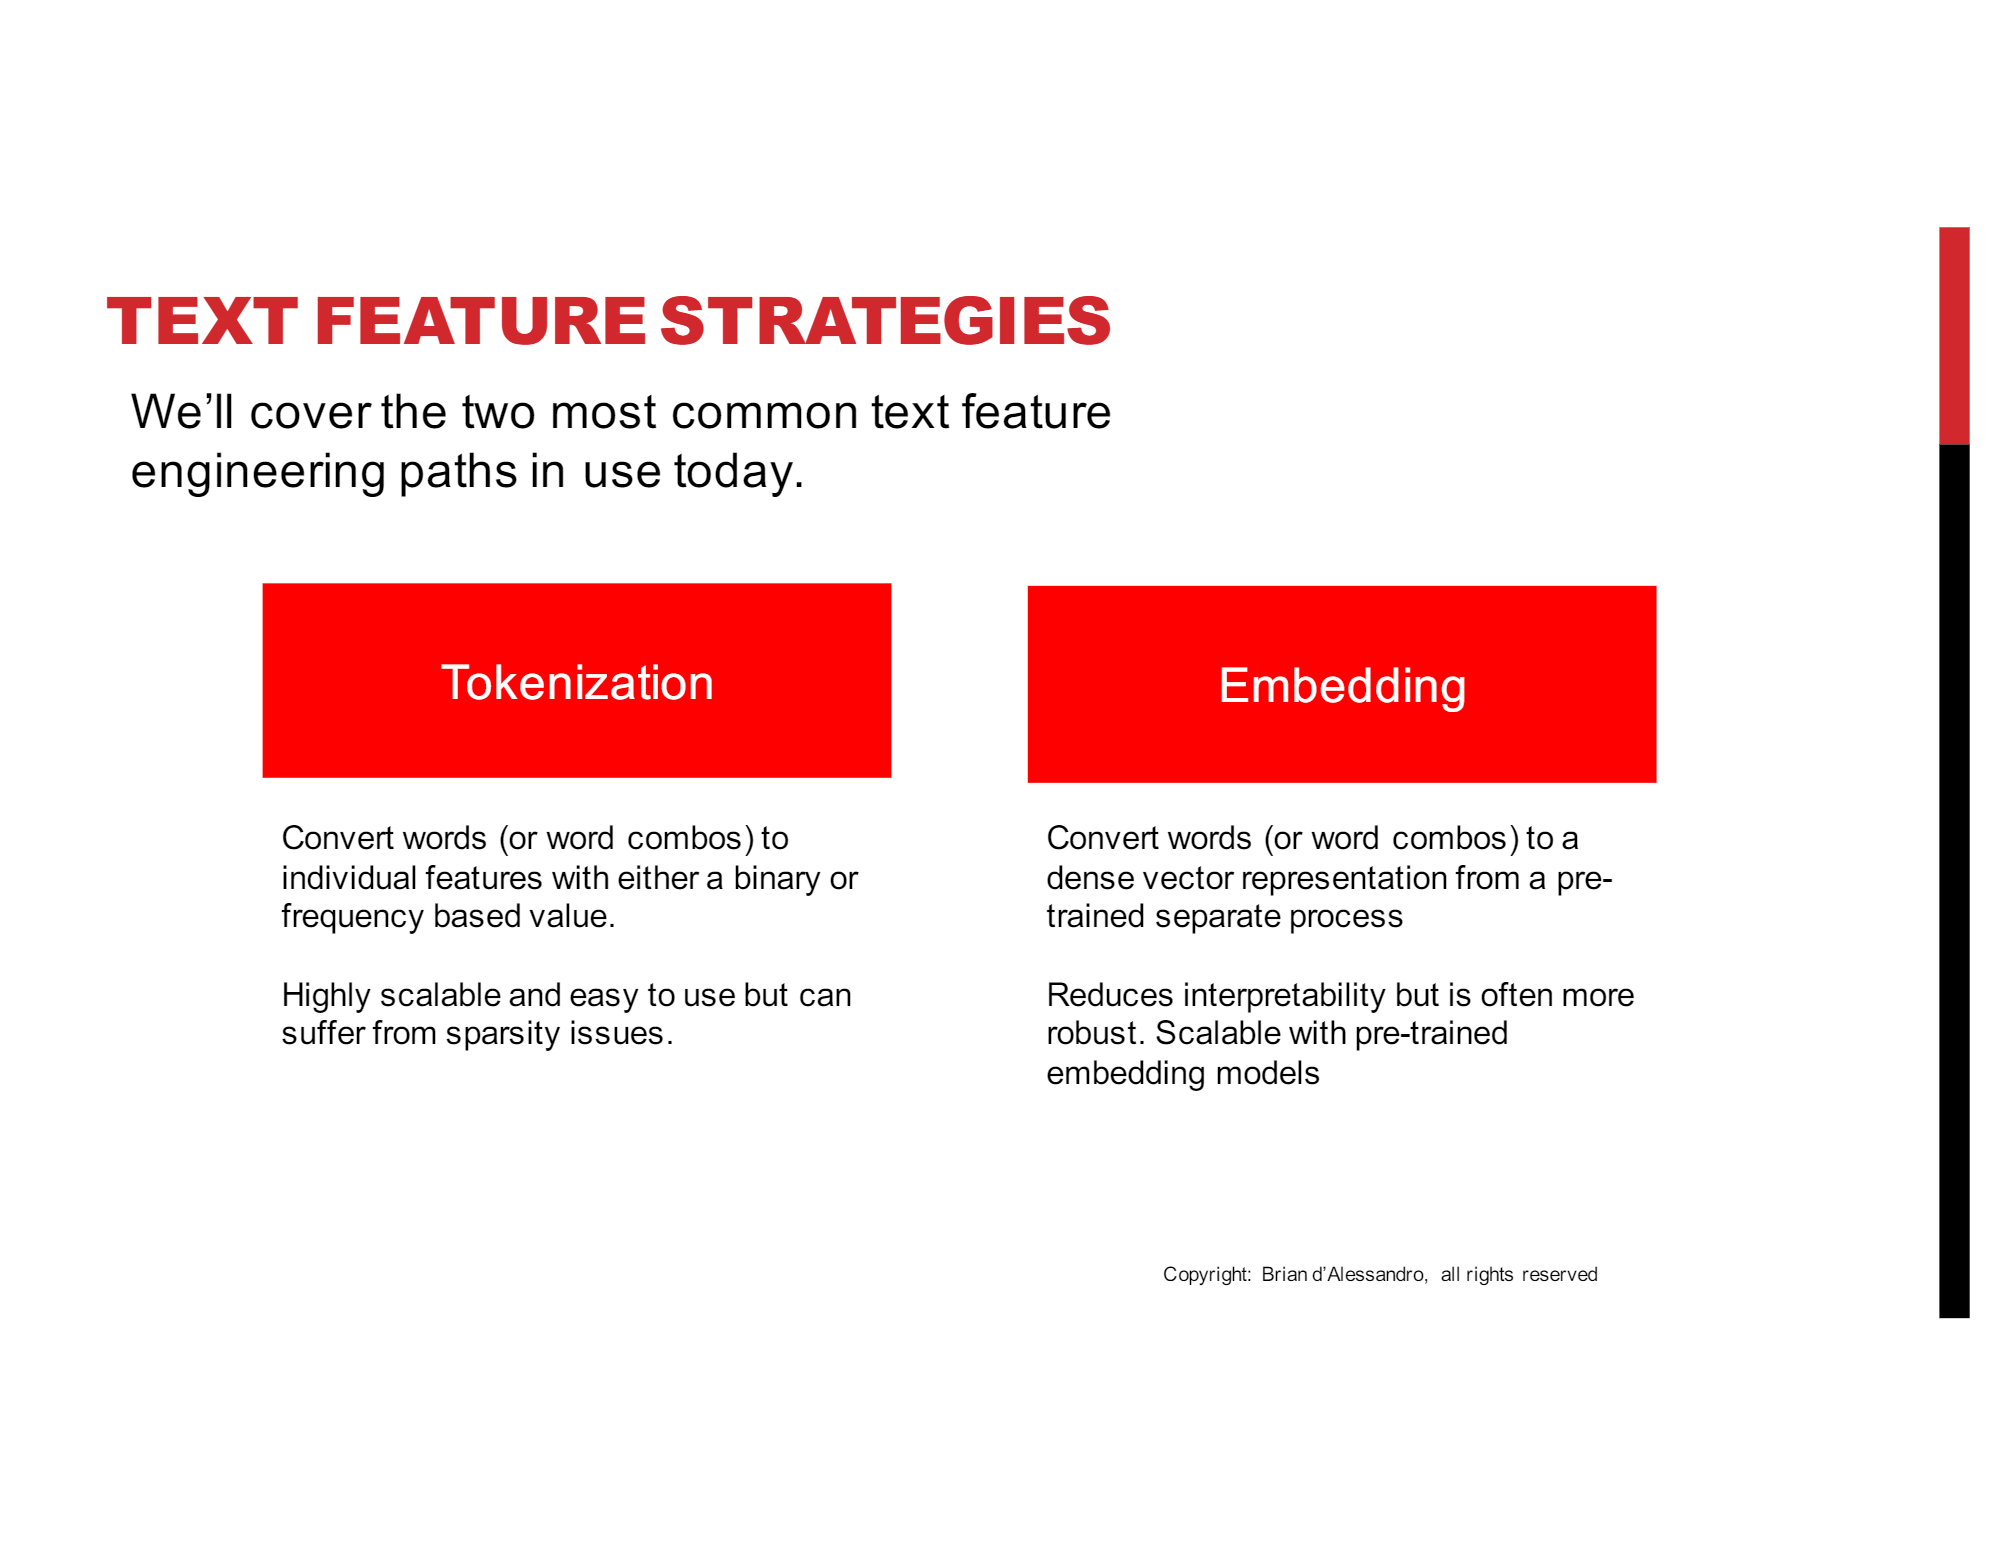

# Tokenization

## Let's Look at some Text

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
twenty_train['data']

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [4]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


## Bag of Words


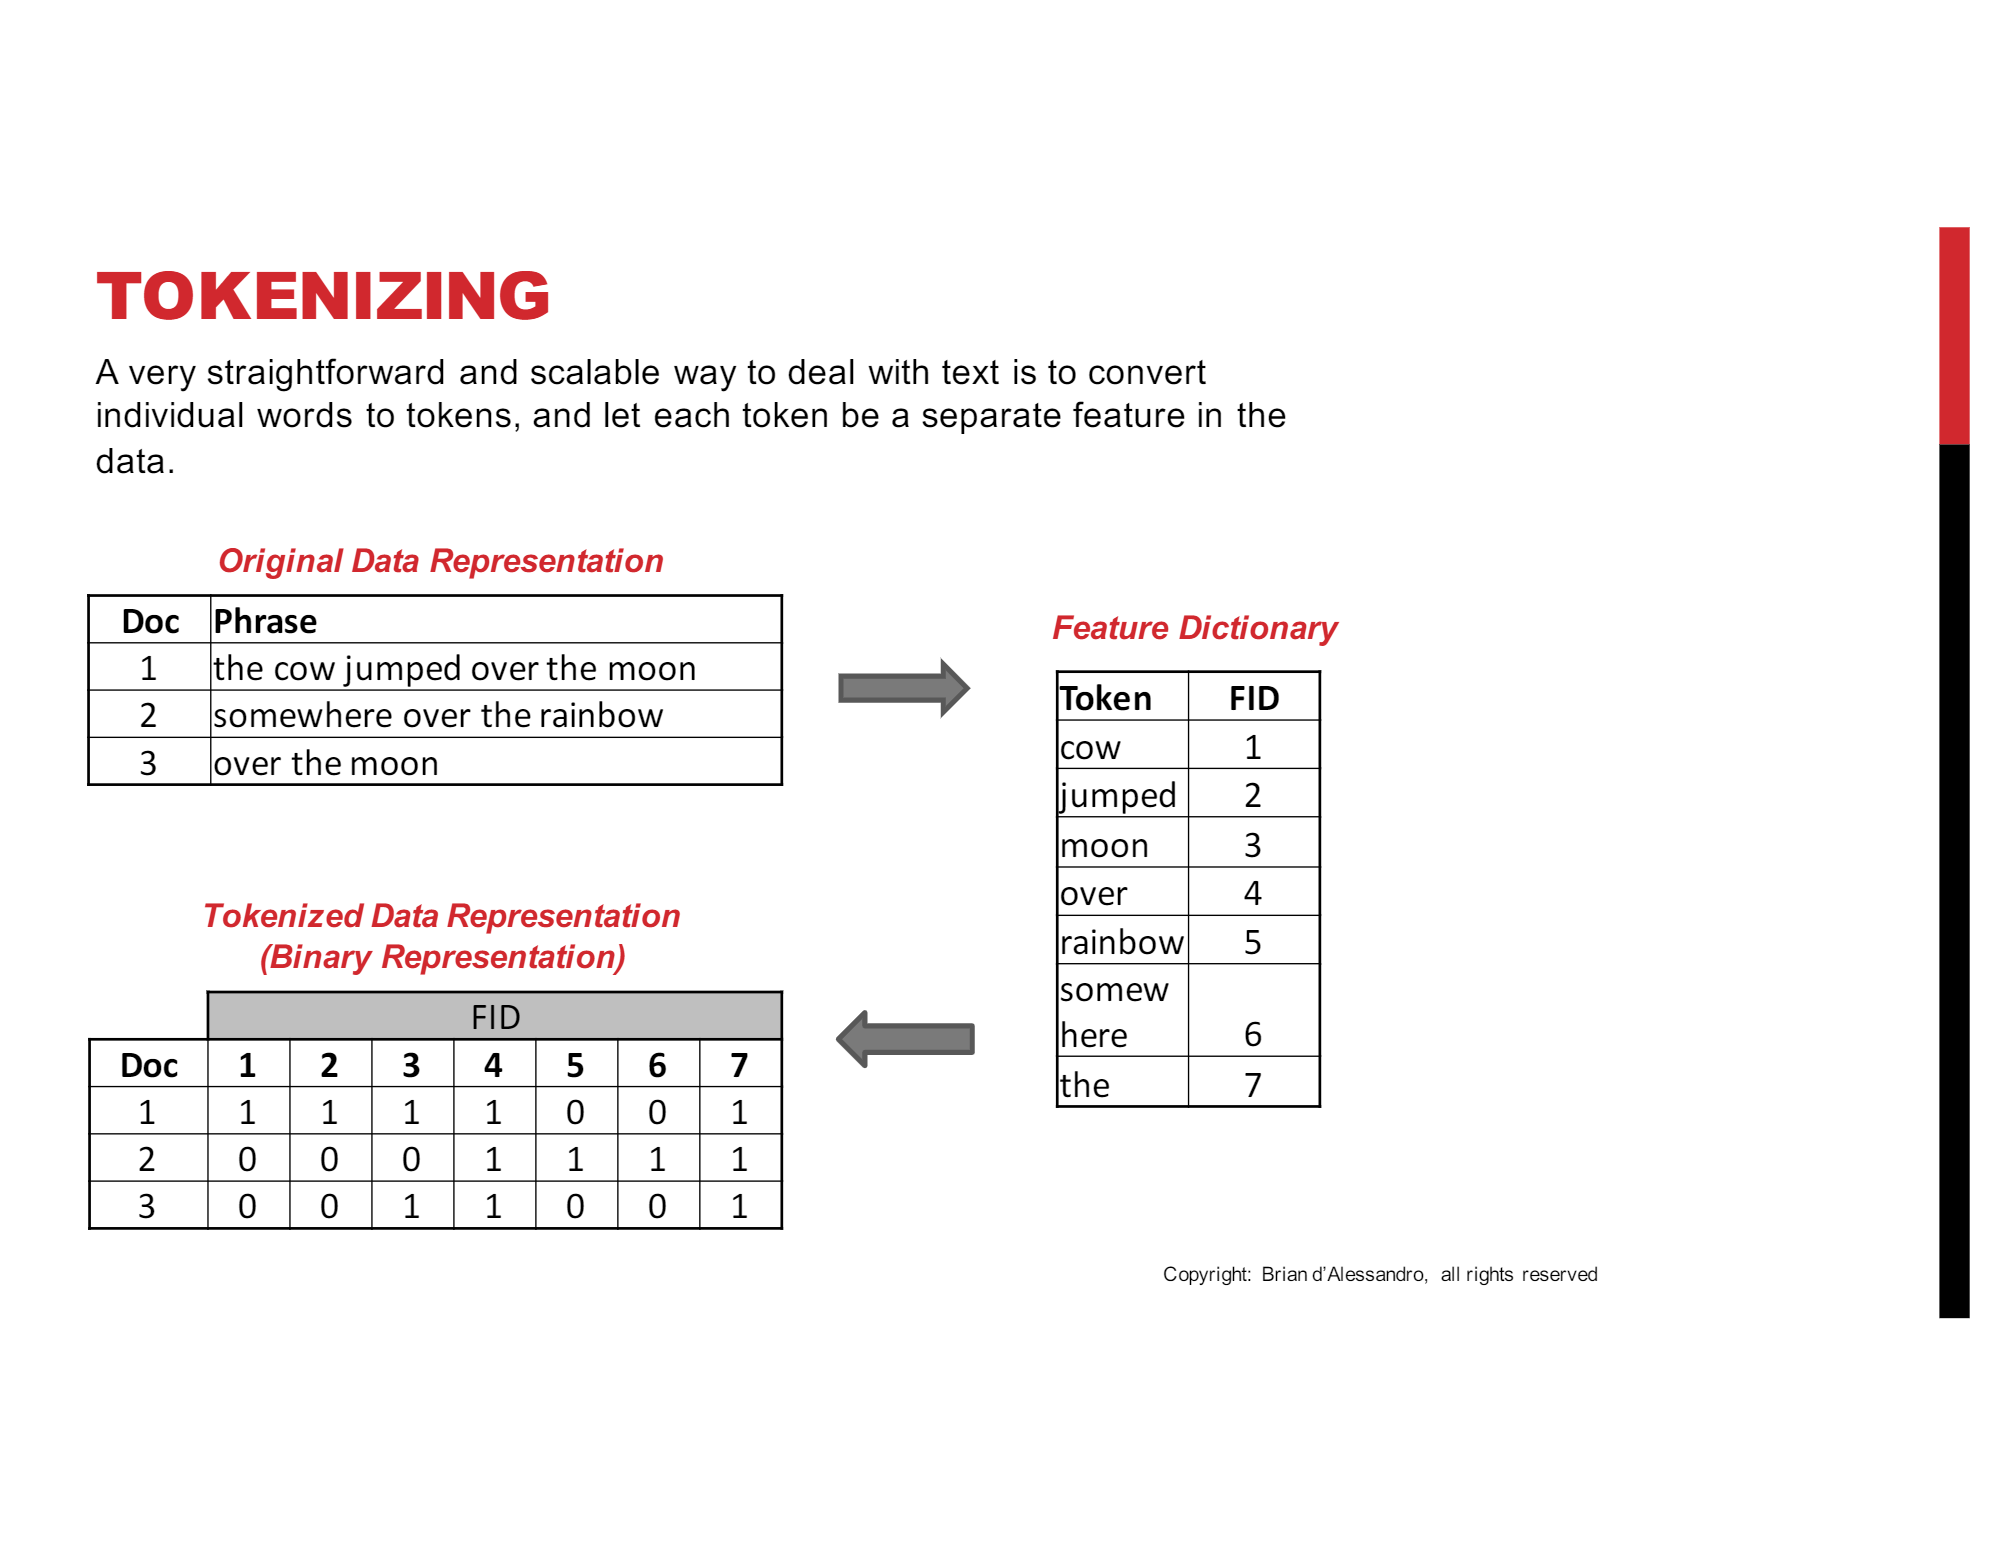

In [5]:
# Lets look at the problem of classification of what type of text is in each email
for t in twenty_train.target[:10]:
     print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [6]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [8]:
count_vect.vocabulary

In [9]:
X_train_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [10]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [13]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [14]:
count_vect.vocabulary_

{'from': 14887,
 'sd345': 29022,
 'city': 8696,
 'ac': 4017,
 'uk': 33256,
 'michael': 21661,
 'collier': 9031,
 'subject': 31077,
 'converting': 9805,
 'images': 17366,
 'to': 32493,
 'hp': 16916,
 'laserjet': 19780,
 'iii': 17302,
 'nntp': 23122,
 'posting': 25663,
 'host': 16881,
 'hampton': 16082,
 'organization': 23915,
 'the': 32142,
 'university': 33597,
 'lines': 20253,
 '14': 587,
 'does': 12051,
 'anyone': 5201,
 'know': 19458,
 'of': 23610,
 'good': 15576,
 'way': 34755,
 'standard': 30623,
 'pc': 24651,
 'application': 5285,
 'pd': 24677,
 'utility': 33915,
 'convert': 9801,
 'tif': 32391,
 'img': 17389,
 'tga': 32116,
 'files': 14281,
 'into': 18268,
 'format': 14676,
 'we': 34775,
 'would': 35312,
 'also': 4808,
 'like': 20198,
 'do': 12014,
 'same': 28619,
 'hpgl': 16927,
 'plotter': 25361,
 'please': 25337,
 'email': 12833,
 'any': 5195,
 'response': 27836,
 'is': 18474,
 'this': 32270,
 'correct': 9932,
 'group': 15837,
 'thanks': 32135,
 'in': 17556,
 'advance': 4378,

In [15]:
# throw away your stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10838233\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## throw away your SUPER uncommon word (Like words that only appear 1-3 times)
 I'm not gonna show that code here.

## Lemmatize your words

In [16]:
# lemmatize your words
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\10838233\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10838233\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


rocks : rock
corpora : corpus
better : good


# EMBEDDINGS

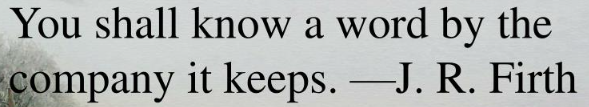

### Co-Occurrence

A co-occurrence matrix counts how often things co-occur in some environment. Given some word $w_i$ occurring in the document, we consider the *context window* surrounding $w_i$. Supposing our fixed window size is $n$, then this is the $n$ preceding and $n$ subsequent words in that document, i.e. words $w_{i-n} \dots w_{i-1}$ and $w_{i+1} \dots w_{i+n}$. We build a *co-occurrence matrix* $M$, which is a symmetric word-by-word matrix in which $M_{ij}$ is the number of times $w_j$ appears inside $w_i$'s window among all documents.

**Example: Co-Occurrence with Fixed Window of n=1**:

Document 1: "all that glitters is not gold"

Document 2: "all is well that ends well"


|     *    | `<START>` | all | that | glitters | is   | not  | gold  | well | ends | `<END>` |
|----------|-------|-----|------|----------|------|------|-------|------|------|-----|
| `<START>`    | 0     | 2   | 0    | 0        | 0    | 0    | 0     | 0    | 0    | 0   |
| all      | 2     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| that     | 0     | 1   | 0    | 1        | 0    | 0    | 0     | 1    | 1    | 0   |
| glitters | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| is       | 0     | 1   | 0    | 1        | 0    | 1    | 0     | 1    | 0    | 0   |
| not      | 0     | 0   | 0    | 0        | 1    | 0    | 1     | 0    | 0    | 0   |
| gold     | 0     | 0   | 0    | 0        | 0    | 1    | 0     | 0    | 0    | 1   |
| well     | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 1    | 1   |
| ends     | 0     | 0   | 1    | 0        | 0    | 0    | 0     | 1    | 0    | 0   |
| `<END>`      | 0     | 0   | 0    | 0        | 0    | 0    | 1     | 1    | 0    | 0   |

**Note:** In NLP, we often add `<START>` and `<END>` tokens to represent the beginning and end of sentences, paragraphs or documents. In this case we imagine `<START>` and `<END>` tokens encapsulating each document, e.g., "`<START>` All that glitters is not gold `<END>`", and include these tokens in our co-occurrence counts.

The rows (or columns) of this matrix provide one type of word vectors (those based on word-word co-occurrence), but the vectors will be large in general (linear in the number of distinct words in a corpus). Thus, our next step is to run *dimensionality reduction*. In particular, we will run *SVD (Singular Value Decomposition)*, which is a kind of generalized *PCA (Principal Components Analysis)* to select the top $k$ principal components. Here's a visualization of dimensionality reduction with SVD. In this picture our co-occurrence matrix is $A$ with $n$ rows corresponding to $n$ words. We obtain a full matrix decomposition, with the singular values ordered in the diagonal $S$ matrix, and our new, shorter length-$k$ word vectors in $U_k$.


In [17]:
from notebook_utils import hide_toggle

ModuleNotFoundError: No module named 'notebook_utils'

In [ ]:
import pandas as pd
sentences = ["all that glitters is not gold",  "all is well that ends well"]

def calc_cooccurrence(sentences, n = 2):
    # TODO: Please implement calculating a co-occurrence matrix for sentences with a parameter for the window size
    return df

In [ ]:
def calc_cooccurrence(sentences, n = 2):
    sent_list = [["<START>"] + sent.split(' ') + ["<END>"] for sent in sentences]
    unique_words = list(set().union(*[set(sent) for sent in sent_list]))
    df = pd.DataFrame(0, columns = unique_words, index = unique_words,)
    for sent in sent_list:
        for i, middle_word in enumerate(sent):
            min_idx = max(0, i-n)
            max_idx = min(len(sent)-1, i+n)
            for j in range(min_idx, max_idx+1):
                if j != i:
                    df.loc[middle_word, sent[j]] += 1
    return df
hide_toggle()


In [ ]:
calc_cooccurrence(sentences)

### The above word vectors are HUGE though. for a large vocabulary (millions of words), we need MILLIONS of parameters for each word. And it's mostly sparse, and we haven't pre-developed the focus on what are the important actual relationships between words usable by downstrema tasks.

How would we develop a vector representation of a word that captures the meaning of the words?

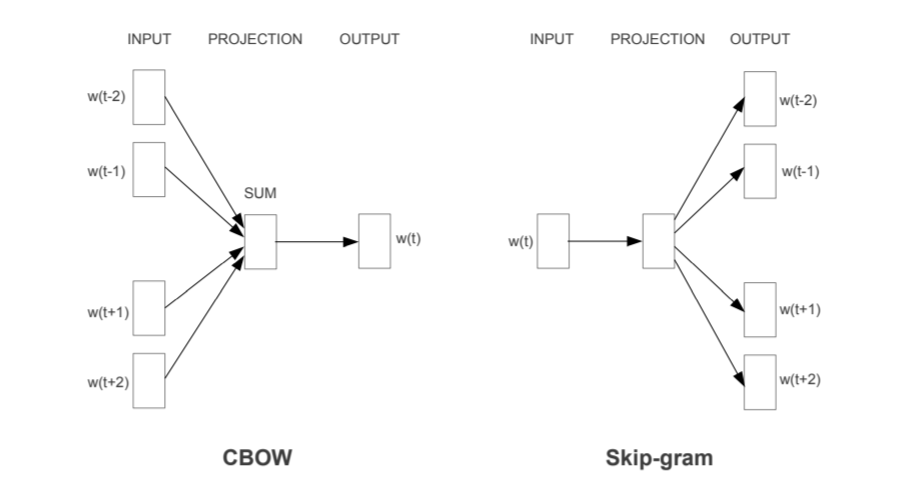



## Motivation for word vectors

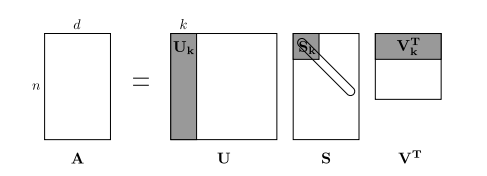

This reduced-dimensionality co-occurrence representation preserves semantic relationships between words, e.g. *doctor* and *hospital* will be closer than *doctor* and *dog*. 

**Notes:** If you can barely remember what an eigenvalue is, here's [a slow, friendly introduction to SVD](https://davetang.org/file/Singular_Value_Decomposition_Tutorial.pdf). If you want to learn more thoroughly about PCA or SVD, feel free to check out lectures [7](https://web.stanford.edu/class/cs168/l/l7.pdf), [8](http://theory.stanford.edu/~tim/s15/l/l8.pdf), and [9](https://web.stanford.edu/class/cs168/l/l9.pdf) of CS168. These course notes provide a great high-level treatment of these general purpose algorithms. Though, for the purpose of this class, you only need to know how to extract the k-dimensional embeddings by utilizing pre-programmed implementations of these algorithms from the numpy, scipy, or sklearn python packages. In practice, it is challenging to apply full SVD to large corpora because of the memory needed to perform PCA or SVD. However, if you only want the top $k$ vector components for relatively small $k$ — known as [Truncated SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition#Truncated_SVD) — then there are reasonably scalable techniques to compute those iteratively.

### How do we actually train a skipgram model?

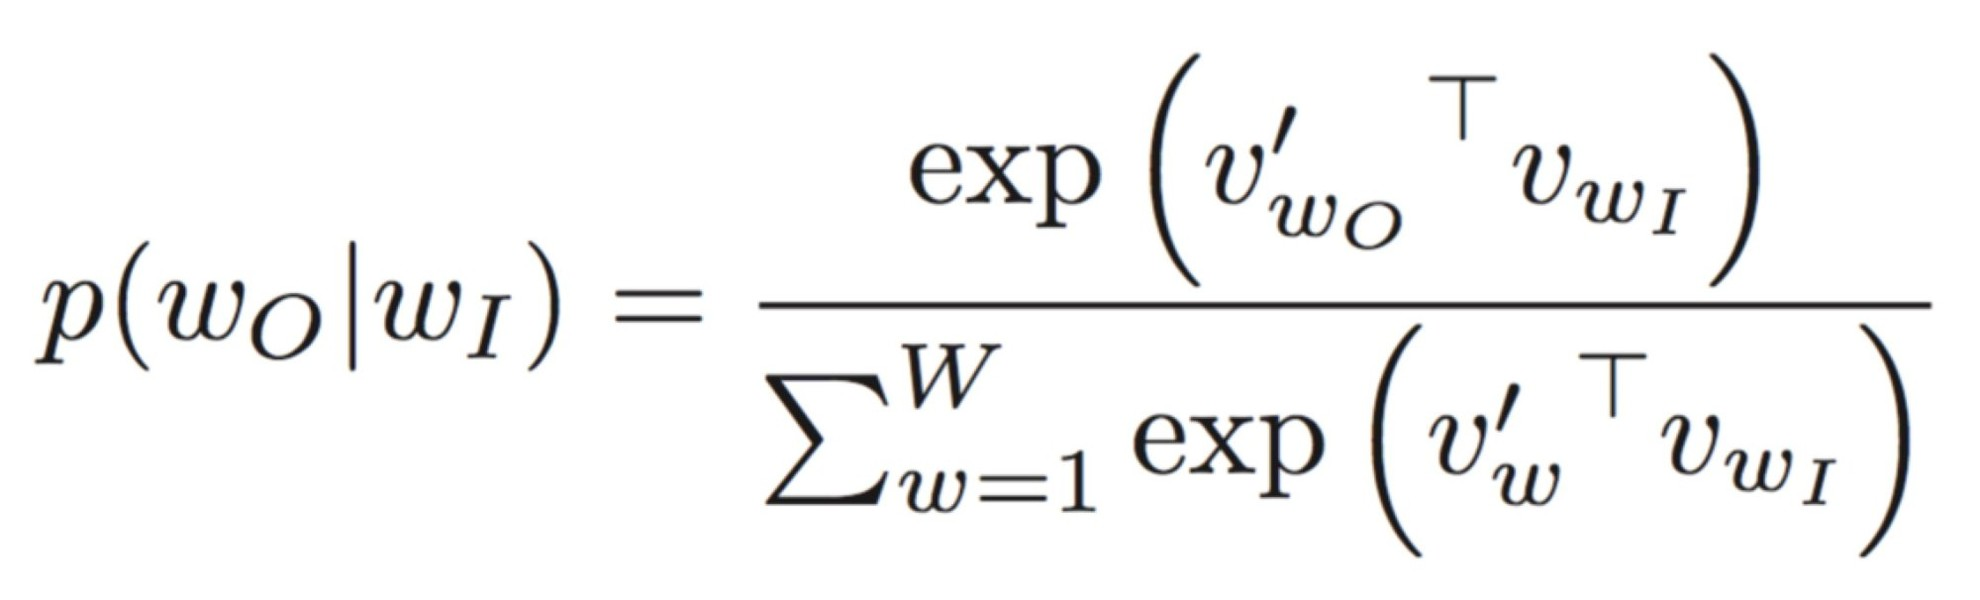


### But this is so inefficient. Look at that denominator term.

To make something more efficient, let's define our loss function of what we want to minimize, instead, as the logarithm.

Loss(U, V) = Sum over context words ( Sum over center words( log(exp(Uo * Vc) / sum(exp(Ui * Vj))) ) )

By logarithm properties, this becomes:

Uo * Vc - log(sum(exp(Ui * vj))

And Look! We've separated out the term that depends on the other datapoints. so we can do negative sampling and just sample a few (3-20) random negative samples for ever positive sample

The final actual formula we derive is

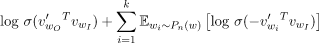

With P being this function of the word unigram probabilities

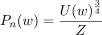

The main takeaway above is that we optimize the probabilitity of the context words we see, pushing up on those probabilities to push up on their vector similarities, while pushing down on the probabilities of other random words that didn't occur



## New innovation! GloVe

So we're going to implement the above. But this is just to understand it, not that it's the current state of the art. The problem is each individual time we're optimizing our word vectors, we're only looking at a few occurrences of words and their context and we're really not efficiently leveraging the statistical distribution information of our cord co-occurrence matrices. There was actually a bunch of work into taking those word co-occurrence matrices and reducing their dimensionality via traditional math reductions. These didn't pan out though, and Stanford came out in 2014 with the idea below which learns word embedding vectors via gradient descent like SkipGram, but does so via leveraging the comprehensive statistical distribution information from the co-occurrance matrix

### GloVe word vectors to more effeciently leverage the total statitics of word co-occurrences
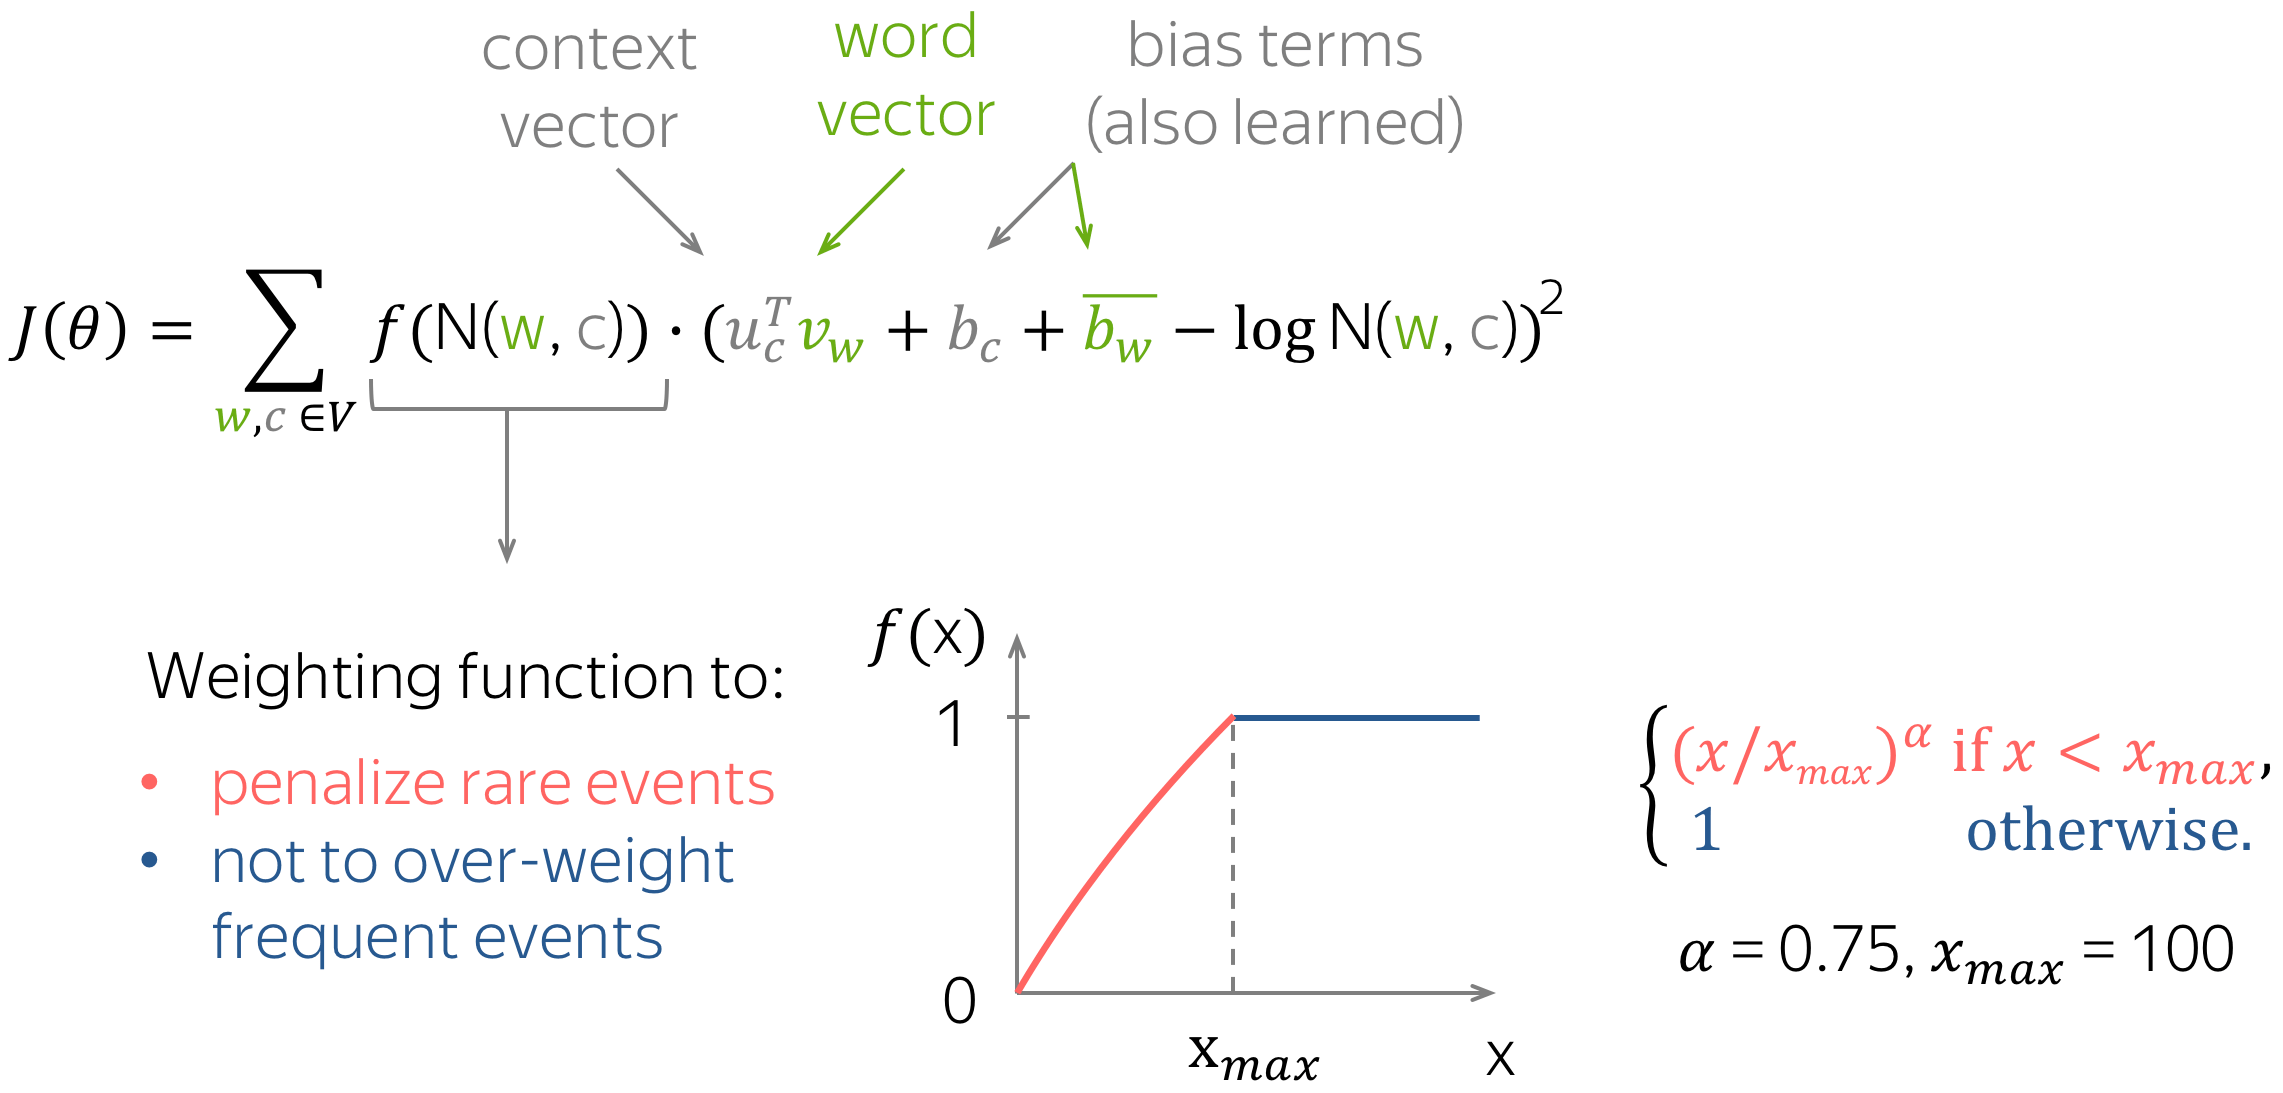

# Intrinsic vs Extrinsic Evaluation
How do you evaluate if your NLP is good? Do you compute how well you do at a task like learning a language representation> This is good (intrinsic) because it's fast. Or do you evaluate how well your new repreesntations can be used to improve building chatbots or other dwonstream tasks? Those are more important, but slower to calculate performance on.

## One cool note about Word2Vec/GloVe word vectors: Analogies

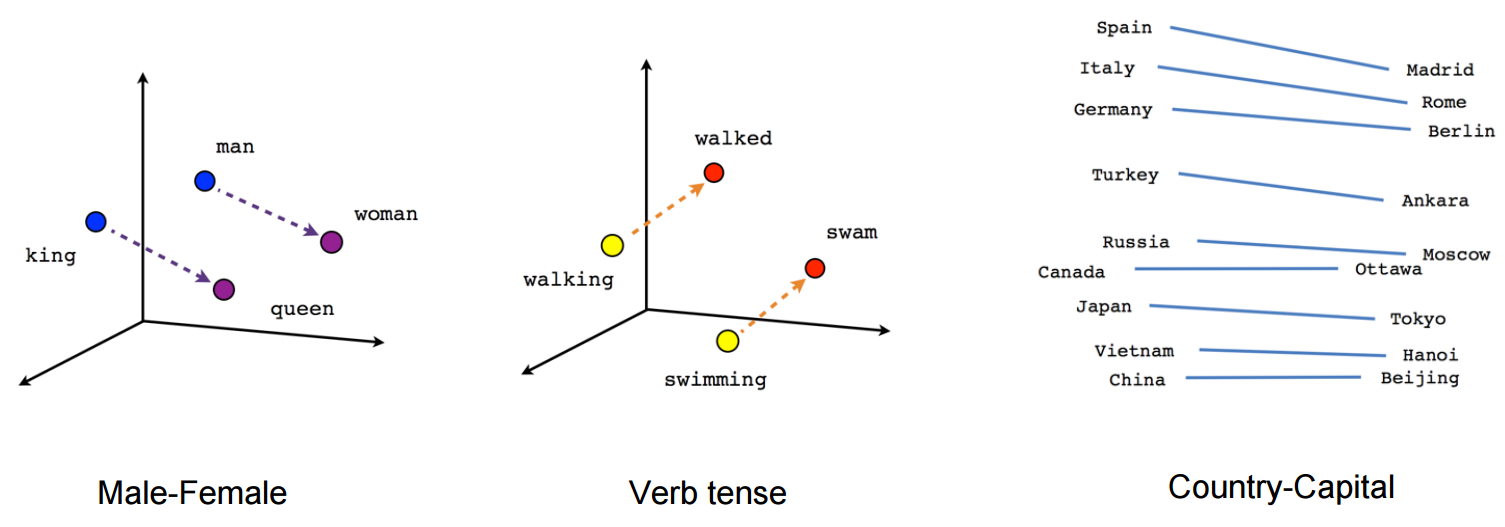

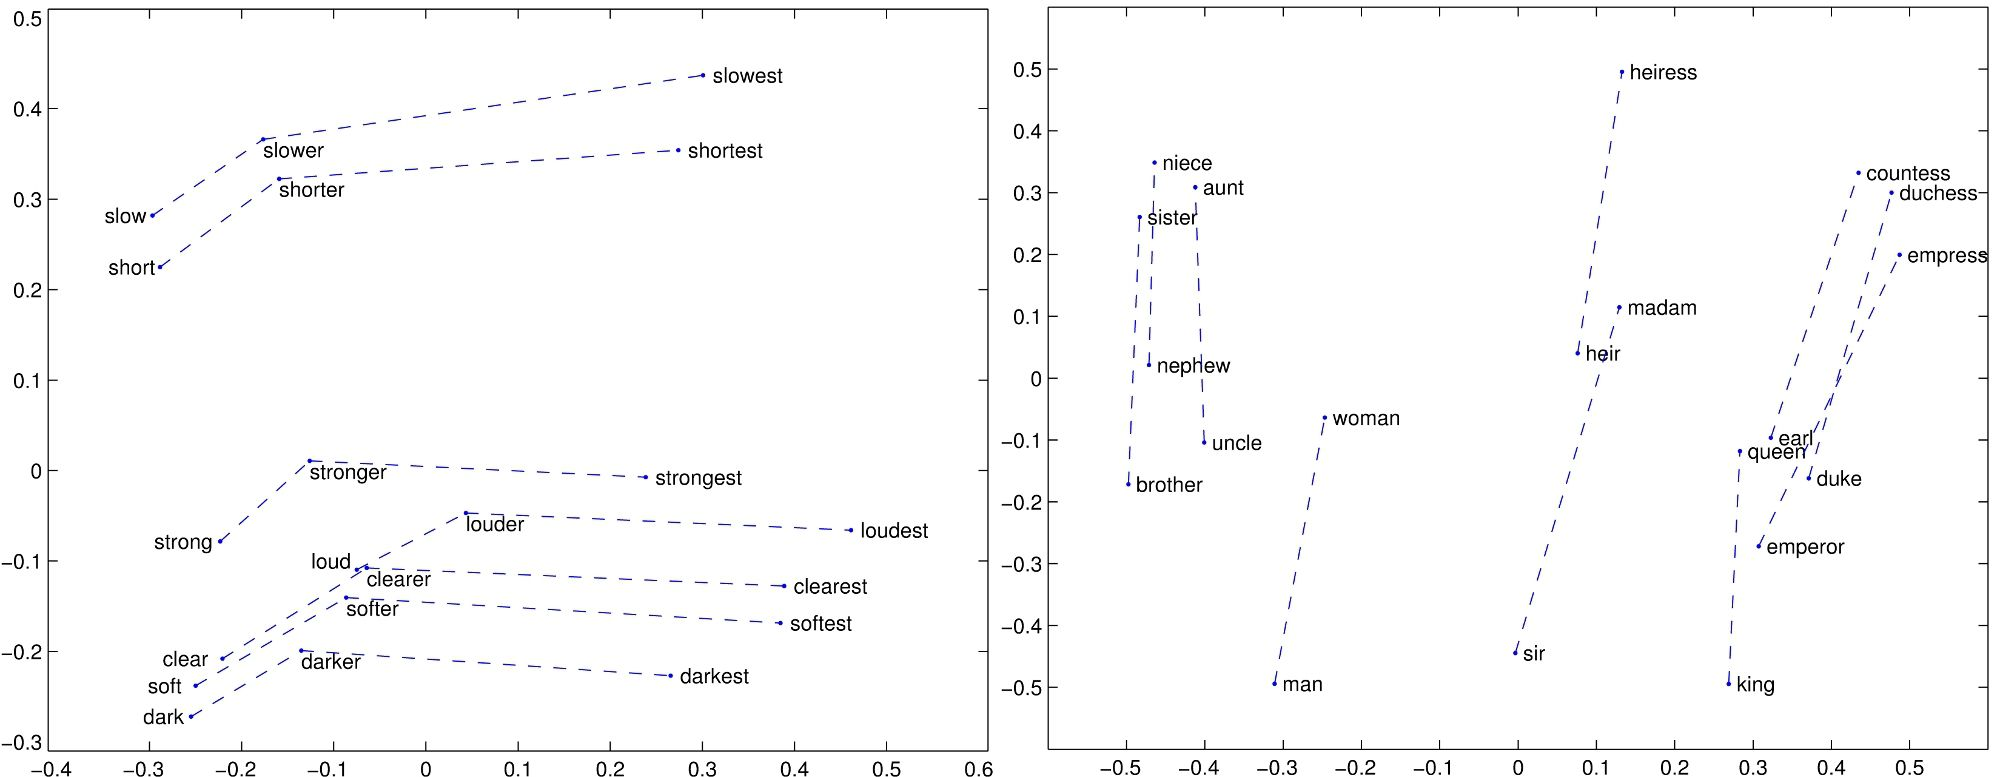

In [ ]:
# Download word vectors from https://nlp.stanford.edu/projects/glove/ into data/

In [ ]:
import numpy as np 

# for loading the glove word embedding matrix values
def load_glove_vectors(glove_file):
    with open(glove_file, 'r', encoding="utf-8") as file:
        # unique words
        words = set()
        word_to_vec = {}
        # each line starts with a word then the values for the different features
        for line in file:
            line = line.strip().split()
            # take the word 
            curr_word = line[0]
            words.add(curr_word)
            # rest of the features for the word
            word_to_vec[curr_word] = np.array(line[1:], dtype=np.float64)
            
    return words, word_to_vec
words, word_to_vec = load_glove_vectors('data/glove.6B.50d.txt')


In [ ]:
def find_cosine_similarity(u, v):
    distance = 0.0
    
    # find the dot product between u and v 
    dot = np.dot(u,v)
    # find the L2 norm of u 
    norm_u = np.sqrt(np.sum(u**2))
    # Compute the L2 norm of v
    norm_v = np.sqrt(np.sum(v**2))
    # Compute the cosine similarity
    cosine_sim = dot/(norm_u)/norm_v
    
    return cosine_sim

In [ ]:
# sample observations
father = word_to_vec["father"]
mother = word_to_vec["mother"]
king = word_to_vec["king"]
queen = word_to_vec["queen"]
bat = word_to_vec["bat"]
crow = word_to_vec["crow"]
india = word_to_vec["india"]
italy = word_to_vec["italy"]
delhi = word_to_vec["delhi"]
rome = word_to_vec["rome"]

print("cosine_similarity(king, queen) = ", find_cosine_similarity(king, queen))
print("cosine_similarity(father, mother) = ", find_cosine_similarity(father, mother))
print("cosine_similarity(king - queen, father - mother) = ",find_cosine_similarity(king - queen, father - mother))
print("cosine_similarity(bat, crow) = ",find_cosine_similarity(bat, crow))
print("cosine_similarity(india - delhi, rome - italy) = ",find_cosine_similarity(india - delhi, rome - italy))

In [ ]:
# does the Word analogy task: a is to b as c is to ____
def find_analogy(word_a, word_b, word_c, word_to_vec):
    # convert words to lower case
    word_a = word_a.lower()
    word_b = word_b.lower()
    word_c = word_c.lower()
    
    
    # find the word embeddings for word_a, word_b, word_c
    e_a, e_b, e_c = word_to_vec[word_a], word_to_vec[word_b], word_to_vec[word_c]
    
    words = word_to_vec.keys()
    max_cosine_sim = -999              
    best_word = None                  

    # search for word_d in the whole word vector set
    for w in words:        
        # ignore input words
        if w in [word_a, word_b, word_c] :
            continue

        # Compute cosine similarity between the vectors u and v
        #u:(e_b - e_a) 
        #v:((w's vector representation) - e_c)
        cosine_sim = find_cosine_similarity(e_b - e_a, word_to_vec[w] - e_c)
        
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            # update word_d
            best_word = w
        
    return best_word
examples = [('india', 'delhi', 'japan'), ('tall', 'taller', 'large')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, word_to_vec)))

In [ ]:
# for taking input from the user and doing word analogy task on that
def take_input():
    print('a --> b :: c --> d')
    print('Enter a, b, c words separated by space')
    words = input().split(' ')
    
    best_pick = find_analogy(*words, word_to_vec)
    print ('{} -> {} :: {} -> {}'.format( *words, best_pick))
    print('Best pick: ' + best_pick)
take_input()


# Last guiding notes

You'd think NLP was mostly solved, we have things like IBM watson that could play jeapardy, alexa, etc.

IBM watson has opened itself up under the hood and it was really just doing word matching on wikipedia, alexa and other at home assistants still mess up fairly simple tasks. We now have a famous GPT-3 model which is unbelievably powerful at learning patterns and predicting future words, but even it clearly doesn't have a good idea of what its talking about.

When we have new NLP benchmarks that come out like GLUE:
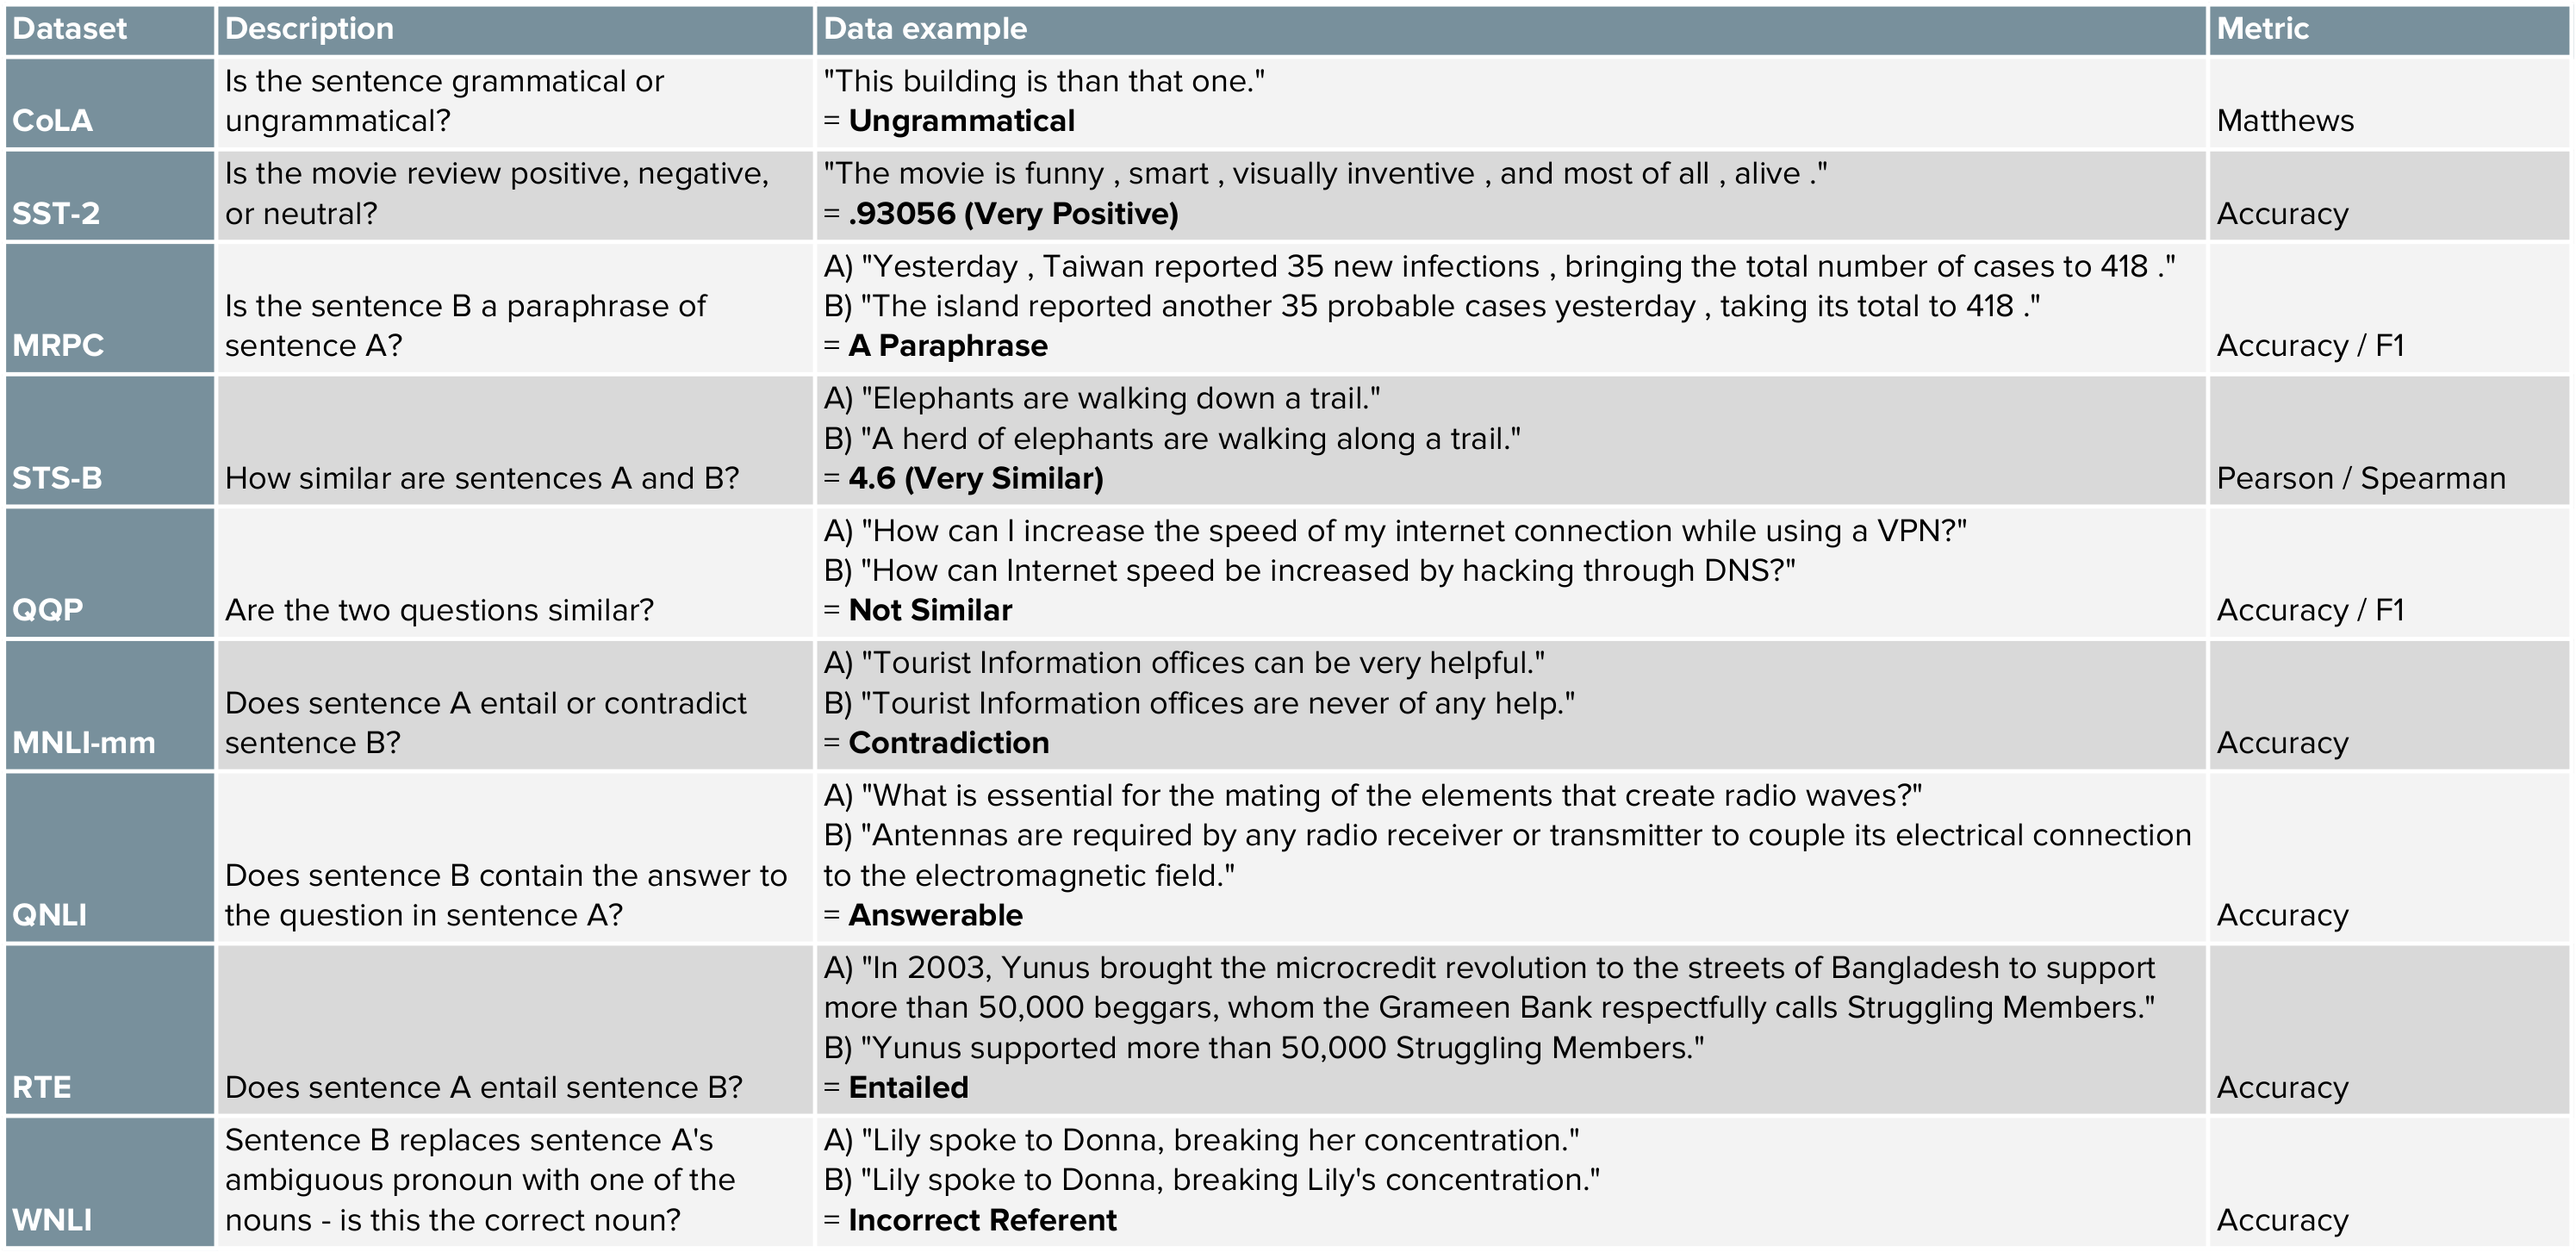

And we now get up to human level performance on them with singular models within a year of publish.

But still we clearly are struggling. Cs224U quotes "The big problems still remain to be solved"

If you think about recommendation engines, we can ABSOLUTELY personalize ads for you. In Computer vision, we can now identify objects in images, track objects, segment images. The only open CV problems
* generating marketing videos automatically
* CV is already used for medical improvements and already outperform doctors in some cases, but there's still room to improve


Compare that to NLP, where the majority of our use-cases have barely been touched. We still call into tech support and a human answers, or we get annoyed if an automated system does

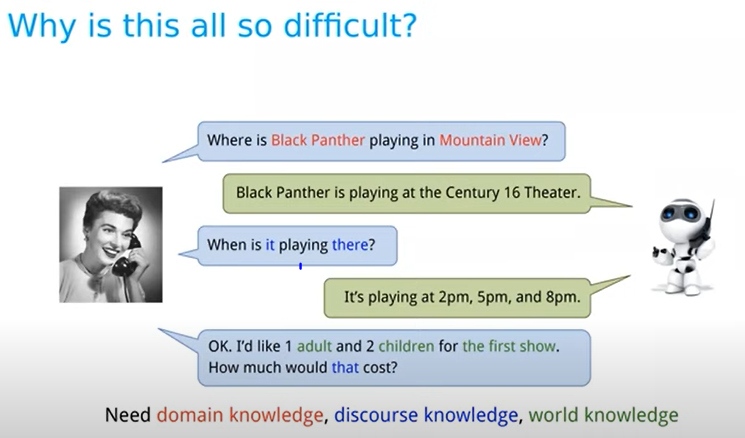
We call references like "it" from sentences to prior mentions anaphora

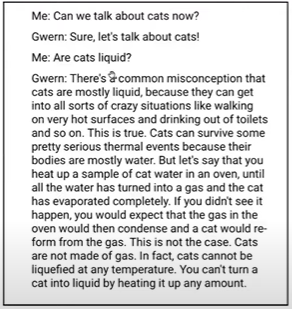

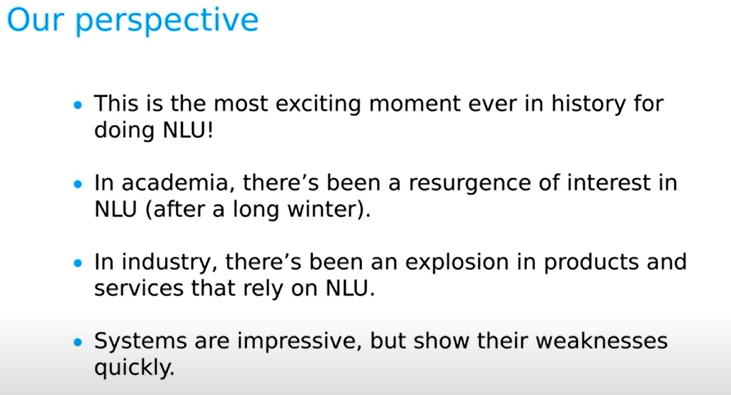

# Next Steps Today
* PyTorch Tutorial

# Next Session:
* Reading through train_skipgram_text8
* Start cs224N Homework 1 on co-occurrance modeling